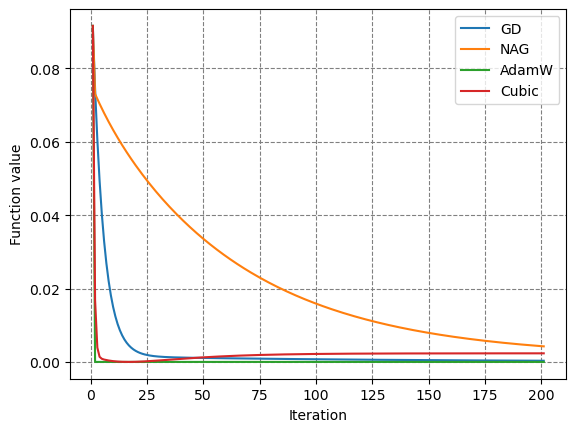

In [36]:
import numpy as np
from utlis import *
from gradient_descent import gradient_descent_update
from nesterov_gd import nesterov_gd_update
from AdamW import adamw_update
from cubic_newton import cubic_newton_update

class Config():
    def __init__(self):
        '''
        ## Type = 1
        self.gd_lr = 1e-3
        self.nag_lr = 1e-3
        self.adamw_lr = 1e-2
        self.cubic_lr = 1e-5

        self.nag_momentum = 0.9
        self.adamw_beta = np.array([0.9, 0.999])

        self.cubic_inner = 20
        self.cubic_t = 1e-6

        self.init_x = np.array([2, 3])

        self.nag_v = np.array([1e-6, 1e-6])
        self.adamw_m = np.array([0, 0])
        self.adamw_v = np.array([0, 0])

        self.type = 1
        '''
        
        ## Type = 2
        self.gd_lr = 1e-1
        self.nag_lr = 1e-2
        self.adamw_lr = 1e-2
        self.cubic_lr = 1e-3

        self.nag_momentum = 0.9
        self.adamw_beta = np.array([0.9, 0.999])

        self.cubic_inner = 1000
        self.cubic_t = 1e-6

        self.init_x = np.array([0.1, -0.5])

        self.nag_v = np.array([1e-6, 1e-6])
        self.adamw_m = np.array([0, 0])
        self.adamw_v = np.array([0, 0])

        self.type = 2
        
        '''
        ## Type = 3
        self.gd_lr = 1e-2
        self.nag_lr = 1e-2
        self.adamw_lr = 1e-4
        self.cubic_lr = 1e-2

        self.nag_momentum = 0.9
        self.adamw_beta = np.array([0.9, 0.999])

        self.cubic_inner = 20
        self.cubic_t = 1e-6

        self.init_x = np.array([0.01, -0.5])

        self.nag_v = np.array([1e-6, 1e-6])
        self.adamw_m = np.array([0, 0])
        self.adamw_v = np.array([0, 0])

        self.type = 3
        '''
        '''
        ##Type = 4
        self.gd_lr = 1e-2
        self.nag_lr = 1e-2
        self.adamw_lr = 1e-4
        self.cubic_lr = 1e-2
        

        self.nag_momentum = 0.9
        self.adamw_beta = np.array([0.9, 0.999])

        self.cubic_inner = 5
        self.cubic_t = 1e-3

        self.init_x = np.array([0.5, -0.1])

        self.nag_v = np.array([1e-6, 1e-6])
        self.adamw_m = np.array([0, 0])
        self.adamw_v = np.array([0, 0])
        '''
        
        '''
        # # Type = 5
        #目标函数
        self.type = 5
        self.gd_lr = 1e-4
        self.nag_lr = 1e-4
        self.adamw_lr = 1e-2
        self.cubic_lr = 1e-5

        self.nag_momentum = 0.9
        self.adamw_beta = np.array([0.9, 0.999])

        self.cubic_inner = 20
        self.cubic_t = 1e-6

        self.init_x = np.array([0.01, -1])

        self.nag_v = np.array([1e-6, 1e-6])
        self.adamw_m = np.array([0, 0])
        self.adamw_v = np.array([0, 0])
        '''

        
        #利普希兹常数
        if self.type == 5:
            self.L = 200
        elif self.type == 4:
            self.L = 8
        else:
            self.L = 5
        
if __name__ == "__main__":
    
    config = Config()

    niter = 200

    gd_fvalue = []
    gd_xhistory = np.zeros((niter+1, 2))
    gd_x1_x2 = config.init_x

    gd_fvalue_0 = target_function(gd_x1_x2[0], gd_x1_x2[1], config.type)
    gd_fvalue.append(gd_fvalue_0)
    gd_xhistory[0, 0] = gd_x1_x2[0]
    gd_xhistory[0, 1] = gd_x1_x2[1]
    
    
    nag_fvalue = []
    nag_xhistory = np.zeros((niter+1, 2))
    nag_x1_x2 = config.init_x
    nag_v = config.nag_v

   
    nag_fvalue_0 = target_function(nag_x1_x2[0], nag_x1_x2[1], config.type)
    nag_fvalue.append(nag_fvalue_0)
    nag_xhistory[0, 0] = nag_x1_x2[0]
    nag_xhistory[0, 1] = nag_x1_x2[1]

    adamw_fvalue = []
    adamw_xhistory = np.zeros((niter+1, 2))
    adamw_x1_x2 = config.init_x
    adamw_m = config.adamw_m
    adamw_v = config.adamw_v
    
    adamw_fvalue_0 = target_function(adamw_x1_x2[0], adamw_x1_x2[1], config.type)
    adamw_fvalue.append(adamw_fvalue_0)
    adamw_xhistory[0, 0] = adamw_x1_x2[0]
    adamw_xhistory[0, 1] = adamw_x1_x2[1]

    cubic_fvalue = []
    cubic_xhistory = np.zeros((niter+1, 2))
    cubic_x1_x2 = config.init_x
    
    cubic_fvalue_0 = target_function(cubic_x1_x2[0], cubic_x1_x2[1], config.type)
    cubic_fvalue.append(cubic_fvalue_0)
    cubic_xhistory[0, 0] = cubic_x1_x2[0]
    cubic_xhistory[0, 1] = cubic_x1_x2[1]
    
    # 噪声参数
    gd_m_n = 0
    gd_v_n = 0
    gd_T = 0
    gd_mu = 150
    
    agd_m_n = 0
    agd_v_n = 0
    agd_T = 0
    agd_mu = 150
    agd_fvalue_t_noise = 0
    
    adamw_m_n = 0
    adamw_v_n = 0
    adamw_T = 0
    adamw_mu = 1000
    adamw_fvalue_t_noise = 0
    
    
    cubic_m_n = 0
    cubic_v_n = 0
    cubic_T = 0
    cubic_mu = 150
    
    for i in range(niter):
        
        # run gradient descent
        gd_x1_x2, gd_grad = gradient_descent_update(gd_x1_x2, config.gd_lr, config.type)
        gd_fvalue_t = target_function(gd_x1_x2[0], gd_x1_x2[1], config.type)
        
        
        #gd_m_n , gd_v_n, gd_noise, gd_T = adaptive_noise_adam( gd_grad, config.gd_m_n, config.gd_v_n, config.gd_T, config.gd_lr )
        
        gd_fvalue.append(gd_fvalue_t)
        gd_xhistory[i+1, 0] = gd_x1_x2[0]
        gd_xhistory[i+1, 1] = gd_x1_x2[1]
        
        ##########################################################################
        # run nesterov's accelarated gradient descent
        nag_x1_x2, nag_v, nag_grad = nesterov_gd_update(nag_x1_x2, nag_v, 
                                       config.nag_lr, config.nag_momentum, 
                                       config.type)
        
        nag_fvalue_t = target_function(nag_x1_x2[0], nag_x1_x2[1], config.type)
        nag_fvalue.append(nag_fvalue_t)
        
        agd_m_n , agd_v_n, agd_noise, agd_T, agd_mu = adaptive_noise_adam( nag_grad, agd_m_n, 
                                                                          agd_v_n, agd_T, 
                                                                       config.nag_lr , agd_mu)
        
        '''
        agd_fvalue_t_noise = target_function(nag_x1_x2[0]+agd_noise[0], nag_x1_x2[1]+agd_noise[1], config.type)
        
        if is_value_down(agd_fvalue_t_noise, nag_fvalue[i+1]):
            nag_x1_x2 = nag_x1_x2 + agd_noise
        '''
        
        nag_xhistory[i+1, 0] = nag_x1_x2[0]
        nag_xhistory[i+1, 1] = nag_x1_x2[1] 
        
        ##########################################################################

        # run adamw
        adamw_x1_x2, adamw_m, adamw_v , adamw_grad = adamw_update(i+1, adamw_x1_x2, 
                                              adamw_m, adamw_v, 
                                              config.adamw_lr, config.adamw_beta, 
                                              config.type, weigh_decay=1e-2)
        adamw_fvalue_t = target_function(adamw_x1_x2[0], adamw_x1_x2[1], config.type)
        adamw_fvalue.append(adamw_fvalue_t)
        #噪声
        '''
        adamw_m_n , adamw_v_n, adamw_noise, adamw_T, adamw_mu = adaptive_noise_adam( adamw_grad, adamw_m_n, 
                                                                          adamw_v_n, adamw_T, 
                                                                       config.adamw_lr , adamw_mu)
        
        
        adamw_fvalue_t_noise = target_function(adamw_x1_x2[0]+adamw_noise[0], adamw_x1_x2[1]+adamw_noise[1], config.type)
        
        if is_value_down(adamw_fvalue_t_noise, adamw_fvalue[i+1]):
            adamw_x1_x2 = adamw_x1_x2 + adamw_noise
        '''
        
        adamw_xhistory[i+1, 0] = adamw_x1_x2[0]
        adamw_xhistory[i+1, 1] = adamw_x1_x2[1] 

        
        ##########################################################################


        # run approximated cubic newton's method
        cubic_x1_x2 = cubic_newton_update(config.cubic_inner, 
                                          cubic_x1_x2, config.cubic_lr, 
                                          config.L, config.cubic_t, config.type)
        
        cubic_fvalue_t = target_function(cubic_x1_x2[0], cubic_x1_x2[1], config.type)

        cubic_fvalue.append(cubic_fvalue_t)
        cubic_xhistory[i+1, 0] = cubic_x1_x2[0]
        cubic_xhistory[i+1, 1] = cubic_x1_x2[1] 





###添加鞍点和局部最小值点


## Type 1
local_min = np.array([[0, 0]])



'''
## Type 2
local_min = np.array([[0.08983, -0.7126],
                      [-0.08983, 0.7126]])

'''

'''
## Type 3
saddle_value = 0
saddle_point = np.array([0, 0])
local_min = np.array([[-1, 0],
                      [1, 0]])

'''
'''
## Type 4
saddle_value = 1
saddle_point = np.array([0, 0])
local_min = np.array([[np.sin(theta), np.cos(theta)] 
                      for theta in np.linspace(0, 2*np.pi, 100)])
'''
'''
## Type 5
saddle_value = 1
saddle_point = np.array([0, 0])
local_min = np.array([[-1, 1],
                      [1, 1]])
'''
#绘画函数下降图形
#function_value_image(niter+1, gd_fvalue, nag_fvalue, adamw_fvalue, cubic_fvalue, saddle_value)
# show_value_image(niter+1, gd_fvalue, "GD")
# show_value_image(niter+1, nag_fvalue, "NAG")
# show_value_image(niter+1, cubic_fvalue, "Cubic")
function_value_image_non(niter+1, gd_fvalue, nag_fvalue, adamw_fvalue, cubic_fvalue)



#绘画梯度下降路径

#descent_path(gd_xhistory, "GD", config.type, local_min, saddle_point, step=5)
#descent_path(nag_xhistory, "NAG", config.type, local_min, saddle_point, step=5)
#descent_path(adamw_xhistory, "AdamW", config.type, local_min, saddle_point, step=5)
#descent_path(cubic_xhistory, "Cubic", config.type, local_min, saddle_point, step=5)
#descent_path_non(adamw_xhistory, "NAG", config.type, local_min, step=5)






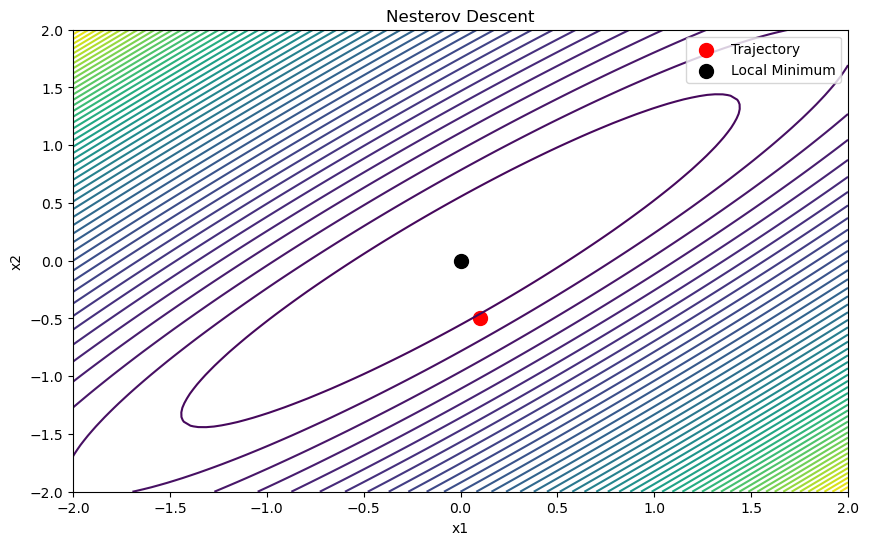

In [19]:
descent_path_non(nag_xhistory, "NAG", config.type, local_min, step=5)
